# 1.5. Tabela de Distribuição de Frequência


Creation on August 9 2021.

Last modification on September 03 2022.

@author: Rogerio Chaves

E-mail: chaves.rogerio@outlook.com

__O que é uma Tabela de Distribuição de Frequência?__

Uma tabela de distribuição de frequência tem por objetivo organizar o conjunto de dados sobre uma variável em uma grupos (que será chamado de classes), onde a partir de suas frquências pode-se de obter algumas informações, de outra forma, "[...] conhecer o _comportamento_ dessa variável, analisando a ocorrência de suas possíveis realizações."(BUSSAB e MORETTIN, 2004)

Importar as bibliotecas

In [56]:
import numpy as np
import pandas as pd
from statistics import mode
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use('seaborn-v0_8')

## Variável qualitativa ordinal

Obter o conjunto de dados.

Neste exemplo trata-se de um conjunto de dados de 32 funcionários da Empresa A.

In [57]:
employees = pd.read_csv('datasets/funcionarios.csv')
display(employees)

,Funcionarios,Escolaridade
0,João Silva,Técnico
1,Maria Rodrigues,Superior
2,Pedro Santos,Fundamental
3,Carlos Pereira,Técnico
4,Ana Ferreira,Técnico
5,Luís Nunes,Superior
6,Sofia Martins,Técnico
7,Mateus Dias,Médio
8,Rafael Gonçalves,Médio
9,Lucas Pereira,Superior


A melhor forma de obter informações desse conjunto de dados é contruir diretamente a tabela de dados, porém com os dados ainda na forma bruta podemos obter a marca ou marcas de maior ocorrência a partir da moda.

In [58]:
education_mode = mode(employees['Escolaridade'])

education_mode_count = employees['Escolaridade'].value_counts()[education_mode]
print(f'Escolaridade com maior ocorrência: {education_mode} - {education_mode_count} funcionários.')

Escolaridade com maior ocorrência: Médio - 11 funcionários.


Devido a variável ser uma varíavel qualitativa não é possível calcular a média e a mediana. Além disso, a informação do que ambas representam não traz muito significado para o tipo de variável analisada.

Ao aplicarmos o cálculo da moda, vemos que para esse conjunto de dados o nível médio é o que tem maior ocorrência em todo o conjunto, o que mostra que o nível médio é a escolaridade com maior ocorrência.

__Atenção:__ Para construir a tabela de distribuição de frequência precisamos compreender a classificação da nossa variável, recomenda-se a leitura do _notebook_ sobre classificação de variáveis <link>. A variável do exemplo dado, sobre a escolaridade de 32 funcionários da Empresa A é uma varíavel do tipo qualitativa ordinal.

Por se tratar de uma varável qualitativa não calcularemos o número de classes e a amplitude total, pois os níveis de escolaridade serão as proprias classes da tabela.

In [59]:
education_levels = ['Fundamental', 'Médio', 'Técnico', 'Superior']

In [60]:
#fi: absolute frequency
fi = {}
for value in education_levels:
    frequency = 0
    for employee in employees['Escolaridade']:
        if employee == value:
            frequency += 1
    fi[value] = frequency

In [61]:
index = list(fi.keys())
data = list(fi.values())

In [62]:
fi_relative = []
for value in data:
    element = np.around((value / sum(data)), 2)
    element = element * 100
    fi_relative.append(element)

Diferente da variável do tipo qualitativa nominal, as frequências acumuladas trazem informações relevantes para a análise.

Vamos criar uma lista com a frequência absoluta acumulada.

In [63]:
fi_accumulated = [data[0]]
for value in range(1, len(data)):
    element = fi_accumulated[value - 1] + data[value]
    fi_accumulated.append(element)

In [64]:
frequency_distribution = pd.DataFrame(index=index, data=data, columns=['Fi'])
frequency_distribution['Fi (%)'] = fi_relative
frequency_distribution['Fi Acumulado'] = fi_accumulated

display(frequency_distribution)

,Fi,Fi (%),Fi Acumulado
Fundamental,5,16.0,5
Médio,11,34.0,16
Técnico,10,31.0,26
Superior,6,19.0,32


Criar um gráfico em barras com as informações da tabela.

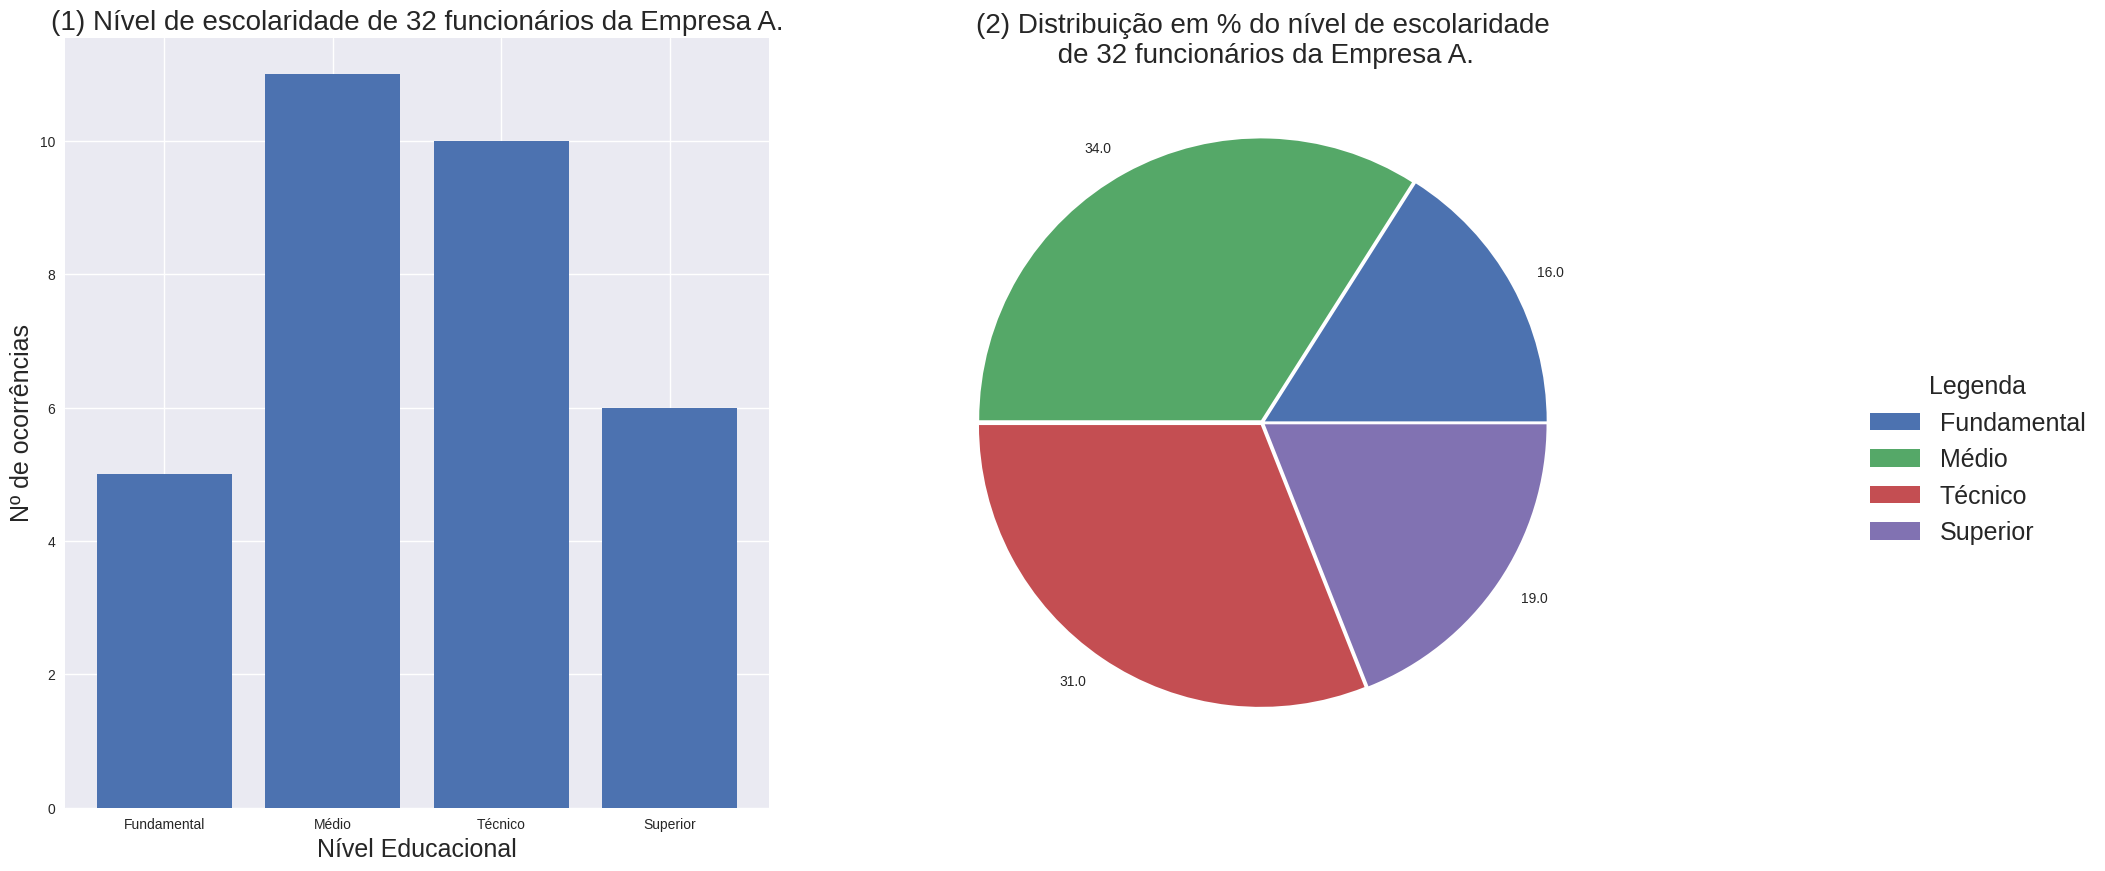

In [65]:
figure = plt.figure(figsize=(20,10))
axes = figure.subplots(nrows=1, ncols=2)

axes[0].bar(frequency_distribution.index, frequency_distribution['Fi'])
axes[0].set_title('(1) Nível de escolaridade de 32 funcionários da Empresa A.', fontsize=20)
axes[0].set_ylabel('Nº de ocorrências', fontsize=18)
#axes[0].get_yticks(fontsize=18)
axes[0].set_xlabel('Nível Educacional', fontsize=18)
#axes[0].get_xticks(fontsize=18)

axes[1].pie(frequency_distribution['Fi (%)'], labels=frequency_distribution['Fi (%)'], 
            explode=(0.01, 0.01, 0.01, 0.01))
axes[1].set_title('(2) Distribuição em % do nível de escolaridade\n de 32 funcionários da Empresa A.', 
                  fontsize=20)
axes[1].legend(bbox_to_anchor=(1.2, 0.5, 0.5, 0.1), title='Legenda', 
               labels=frequency_distribution.index, fontsize=18, title_fontsize=18)

Podemos visualizar a confirmação do valor da moda onde o nível médio é o que possui mais ocorrência no conjunto de dados, tanto no gráfico 1 onde mostra que nível médio obteve 11 ocorrências, quanto no gráfico 2 onde o nível médio possui 34% das ocorrências.

Além disso, podemos visualizar que os funcionários que possui nível técnico ou superior representam 50% das ocorrências.

In [66]:
technical_and_undergraduate = sum(frequency_distribution['Fi (%)'][2:])
print(f'{technical_and_undergraduate}% dos funcionários')

50.0% dos funcionários


Outra informação que poderia ser análisado seria a porcentagem de funcionários que possuem ao menos o ensino médio.

In [67]:
least_secondary = sum(frequency_distribution['Fi (%)'][1:])
print(f'{least_secondary}% dos funcionários')

84.0% dos funcionários


Vemos que 84% dos funcionarios possui ao menos o ensino médio.

Podemos saber quantos funcionários não possuem o ensino superior.

In [68]:
without_undergraduate = sum(frequency_distribution['Fi'][:3])
without_undergraduate_percentage = sum(frequency_distribution['Fi (%)'][:3])
print(f'{without_undergraduate} funcionários que representam {without_undergraduate_percentage}% do total.')

26 funcionários que representam 81.0% do total.


Além disso, temos que alguns funcionários possuem apenas o nível fundamental, que conforme a tabela são:

In [69]:
elementary = frequency_distribution['Fi (%)']['Fundamental']
print(f'{elementary}% dos funcionários.')

16.0% dos funcionários.


## Referências:

BUSSAB, Wilton de O.; MORETTIN, Pedro A. Estatística Básica. 5ª edição. São Paulo: Editora Saraiva, 2004.